In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/기계학습 2주차/diabetes_1.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [2]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [3]:
#칼럼명 확인 후 결측지 확인을 해야됨
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


In [4]:
# 1) feature / label 분리
X = df.drop(columns=["BMI"])
y = df["BMI"]

In [5]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [6]:
y

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [7]:
# 딥러닝 모델에 넣기 전 데이터 전처리(스케일링)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# 원 핫 앤코딩
import numpy as np

Y = pd.get_dummies(y).values
X = np.asarray(X) #넘파이 형태로 변형. X = X.values가 오류가 생겨서 사용

In [9]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.69289057,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.69289057,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.69289057,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.27959377,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.69289057,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.69289057,
        -0.47378505, -0.87137393]])

In [10]:
y

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((614, 7), (614, 248), (154, 7), (154, 248))

In [13]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(X.shape[1],),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,295 (5.06 KB)

 Trainable params: 1,295 (5.06 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train,
                  epochs=N_EPOCHS, batch_size=32,
                  validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mse:

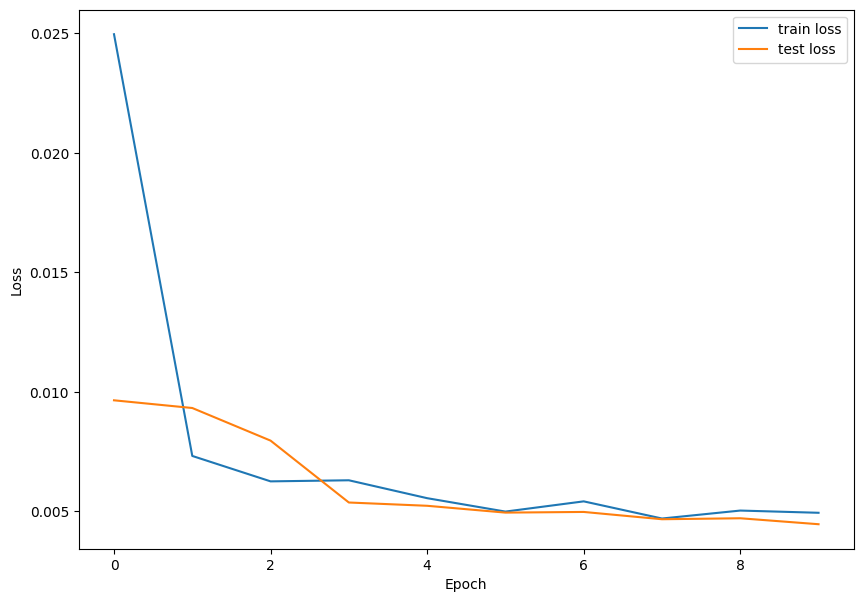

In [15]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mse: 0.0045 


[0.0044549633748829365, 0.0044549633748829365]